In [16]:
#import all the lib

import torch
from torchvision.datasets import MNIST
from torch import optim
import torch.nn as nn
from torchvision import transforms

from torch.utils.data import DataLoader

In [17]:
##dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

training_dataset = MNIST(root = "data" , download = True ,train = True, transform = transform)
test_datset = MNIST(root = "data" , download = True , train = False , transform = transform)

In [18]:
len(training_dataset) , len(test_datset)

(60000, 10000)

In [19]:
train_dataloader = DataLoader(training_dataset , 64 , shuffle = True)
test_dataloader = DataLoader(test_datset , 64 , shuffle = True)

In [21]:
len(train_dataloader) , len(test_dataloader)

(938, 157)

In [31]:
class number_classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear( 28*28 , 128),
            nn.ReLU(),
            nn.Linear(128 , 64),
            nn.ReLU(),
            nn.Linear(64,10),
        )

    def forward(self , x):
        return self.network(x)
        

In [37]:
model = number_classifier()
criterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters() , lr = 0.001)

epochs = 5

for epoch in range(epochs):
    running_loss = 0.0
    for image , label in train_dataloader:
        optimizer.zero_grad()
        
        outputs = model(image)
        loss  = criterian(outputs , label)
        
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss / len(train_dataloader):.4f}")

Epoch [1/5], Loss: 0.4094
Epoch [2/5], Loss: 0.1990
Epoch [3/5], Loss: 0.1433
Epoch [4/5], Loss: 0.1147
Epoch [5/5], Loss: 0.0969


In [40]:
# Testing the model
model.eval()  # Switch to evaluation mode

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test set: {100 * correct / total:.2f}%')

Accuracy on the test set: 96.90%


### classification report and the confusion matrix

In [53]:
model.eval()

all_predicteds = []
all_label = []

with torch.no_grad():
    for image , labels in test_dataloader:
        output = model(image)
        _ , predicted  = torch.max(output.data , 1)
    
        all_predicteds.extend(predicted.numpy())
        all_label.extend(labels.numpy())

In [55]:
from sklearn.metrics import classification_report


cls = classification_report(all_predicteds , all_label)
print(cls)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       987
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1005
           3       0.98      0.95      0.96      1035
           4       0.96      0.98      0.97       962
           5       0.97      0.97      0.97       890
           6       0.97      0.97      0.97       955
           7       0.95      0.97      0.96       998
           8       0.96      0.97      0.97       964
           9       0.98      0.92      0.95      1069

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(all_predicteds , all_label)
print(cm)

[[ 965    0    7    0    1    4    5    0    2    3]
 [   0 1124    0    0    1    0    3    6    0    1]
 [   0    2  986    2    0    0    2   12    1    0]
 [   3    2   12  986    0    7    2    7   11    5]
 [   0    0    8    1  938    2    3    0    4    6]
 [   2    1    0    5    0  865   13    0    3    1]
 [   4    1    6    0    7    4  927    1    4    1]
 [   0    2    5    6    3    0    1  973    4    4]
 [   2    2    8    3    2    7    2    0  938    0]
 [   4    1    0    7   30    3    0   29    7  988]]


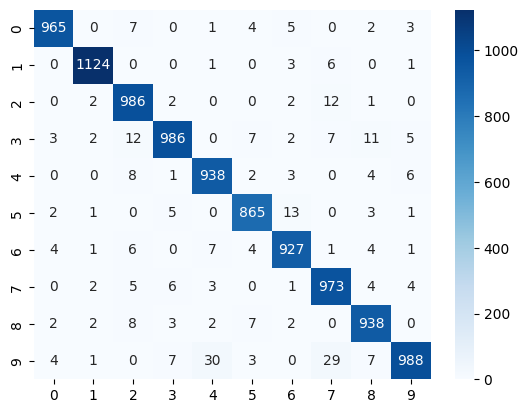

In [59]:
from matplotlib import pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(cm)), yticklabels=range(len(cm)))
plt.show()